In [2]:
print(f"\t\tInstance {1}, matches: {f'{2},':<{2}} position: ({str(3):<{4}}, {f'{str(5)}':<{6-1}}), width: {f'{7}':<{8-1}}, height: {9:<{8-1}}")

		Instance 1, matches: 2, position: (3   , 5    ), width: 7      , height: 9      


[[  10   14]
 [  11 1063]
 [ 813 1063]
 [ 813   14]]
[[  10   14]
 [  11 1063]]
[[1.000e+00 1.049e+03]]
(411.75, 538.5)


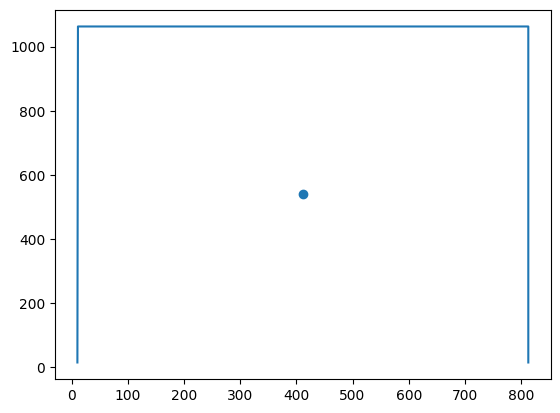

In [3]:
import matplotlib.pyplot as plt
import numpy as np
h = 4
b = 6

pts = np.array([[10,   14],
                [11, 1063],
                [813, 1063],
                [813,   14]])
print(pts)

print(pts[:2,:])
print(np.sqrt(np.subtract(pts[:1,:],pts[1:2,:])**2))

x = [pt[0] for pt in pts]
y = [pt[1] for pt in pts]
plt.plot(x, y)

center = np.sum(pts, axis=0)/4
print(str(tuple(center)))
plt.scatter(*center)

In [4]:
def remove_used4(points,angles,colors):
    angles=[tuple(row[0]) for row in angles]
    for i in range(points.shape[1]):
        px, py = points[:,i]
        count = 0
        n = len(angles)
        remove=False
        for angle in range(n):
            x1, y1 = angles[angle]
            x2, y2 = angles[(angle + 1) % n]

            # Check if the point is exactly on a vertex
            if (px, py) == (x1, y1) or (px, py) == (x2, y2):
                remove= True

            # Check if the point is on the edge
            if y1 != y2 and min(y1, y2) <= py <= max(y1, y2):
                x_intercept = (py - y1) * (x2 - x1) / (y2 - y1) + x1
                if px == x_intercept:
                    remove= True

            # Check intersections with a ray from the point
            if (y1 <= py < y2) or (y2 <= py < y1):
                x_intercept = (py - y1) * (x2 - x1) / (y2 - y1) + x1
                if px < x_intercept:
                    count += 1

        if count % 2 == 1 or remove:
            # print(f'point:{keypoints[i-removed].pt}, angles:{angles}')
            colors[i]=255
    return colors

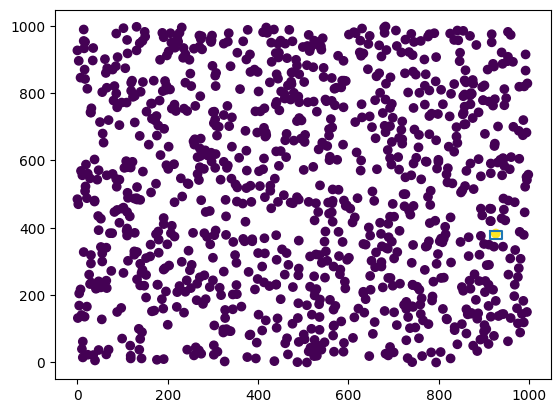

In [11]:
points=np.random.randint(1000, size=(2, 1000))
colors=np.ones((1000,))
angles=np.array([
 [[912.5, 390. ]],
 [[912.5, 368. ]],
 [[939.5, 368. ]],
 [[939.5, 390. ]],
 ])
colors=remove_used4(points,angles,colors)
angles=[tuple(row[0]) for row in angles]
plt.plot([angle[0] for angle in angles]+[angles[0][0]],[angle[1] for angle in angles]+[angles[0][1]])
plt.scatter(points[0],points[1],c=colors)

<Figure size 640x480 with 0 Axes>

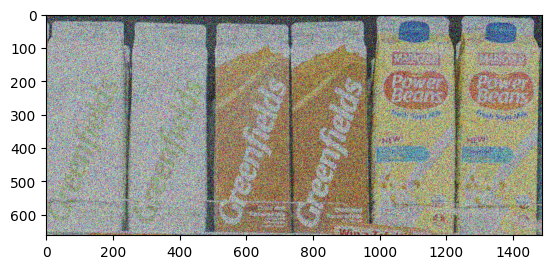

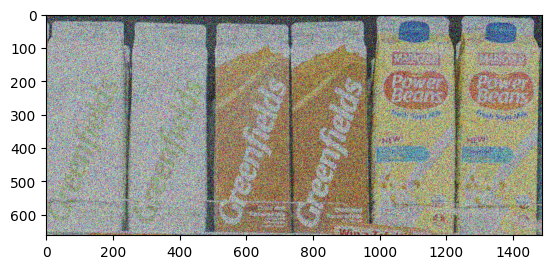

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# from skimage.restoration import denoise_nl_means


image=cv2.imread('dataset/scenes/scene9.png')[:,:,::-1]
plt.imshow(image)
plt.figure()
restored=cv2.fastNlMeansDenoisingColored(image, None, 3, 3, 7, 21)
plt.imshow(image)
plt.figure()

In [7]:
a=[1,2,3,4]
a[:]=[0 for _ in range(len(a))]
print(a)

[0, 0, 0, 0]
